# Decision Tree for Predicting Breast Cancer

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#### Loading the Breast Cancer dataset


In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### Splitting the data into input features (X) and target labels (y)


In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
X = cancer.data
y = cancer.target

In [8]:
X.shape

(569, 30)

In [15]:
y.shape

(569,)

#### Plotting the data

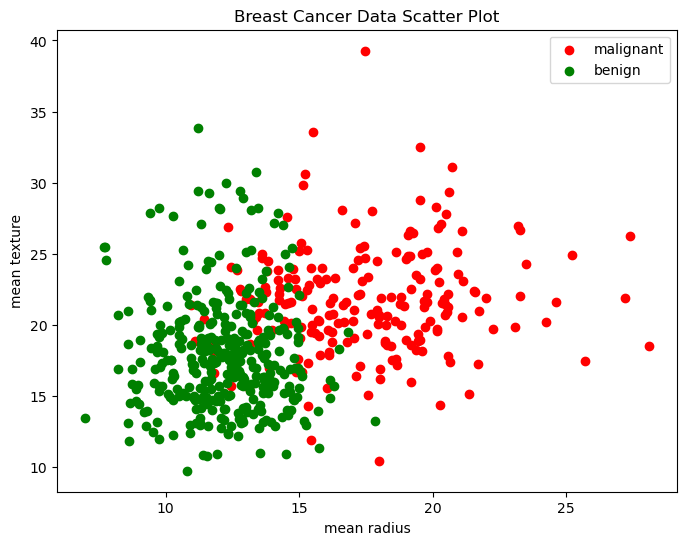

In [17]:
plt.figure(figsize=(8, 6))

# Set the color map for different classes
colors = ['red', 'green']
for i in range(2):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=colors[i], label=cancer.target_names[i])
# Set the labels and title
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title('Breast Cancer Data Scatter Plot')

# Set the legend
plt.legend()

# Display the plot
plt.show()

#### Splitting the data into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Introducing DecisionTreeClassifier

In [21]:
model = DecisionTreeClassifier()

#### Fit the model to the training data

In [23]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Predict on the test data

In [25]:
X_test[0]

array([1.247e+01, 1.860e+01, 8.109e+01, 4.819e+02, 9.965e-02, 1.058e-01,
       8.005e-02, 3.821e-02, 1.925e-01, 6.373e-02, 3.961e-01, 1.044e+00,
       2.497e+00, 3.029e+01, 6.953e-03, 1.911e-02, 2.701e-02, 1.037e-02,
       1.782e-02, 3.586e-03, 1.497e+01, 2.464e+01, 9.605e+01, 6.779e+02,
       1.426e-01, 2.378e-01, 2.671e-01, 1.015e-01, 3.014e-01, 8.750e-02])

In [27]:
y_pred = model.predict(X_test)

#### Calculating the accuracy of the model

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9385964912280702


##### Plotting the decision tree

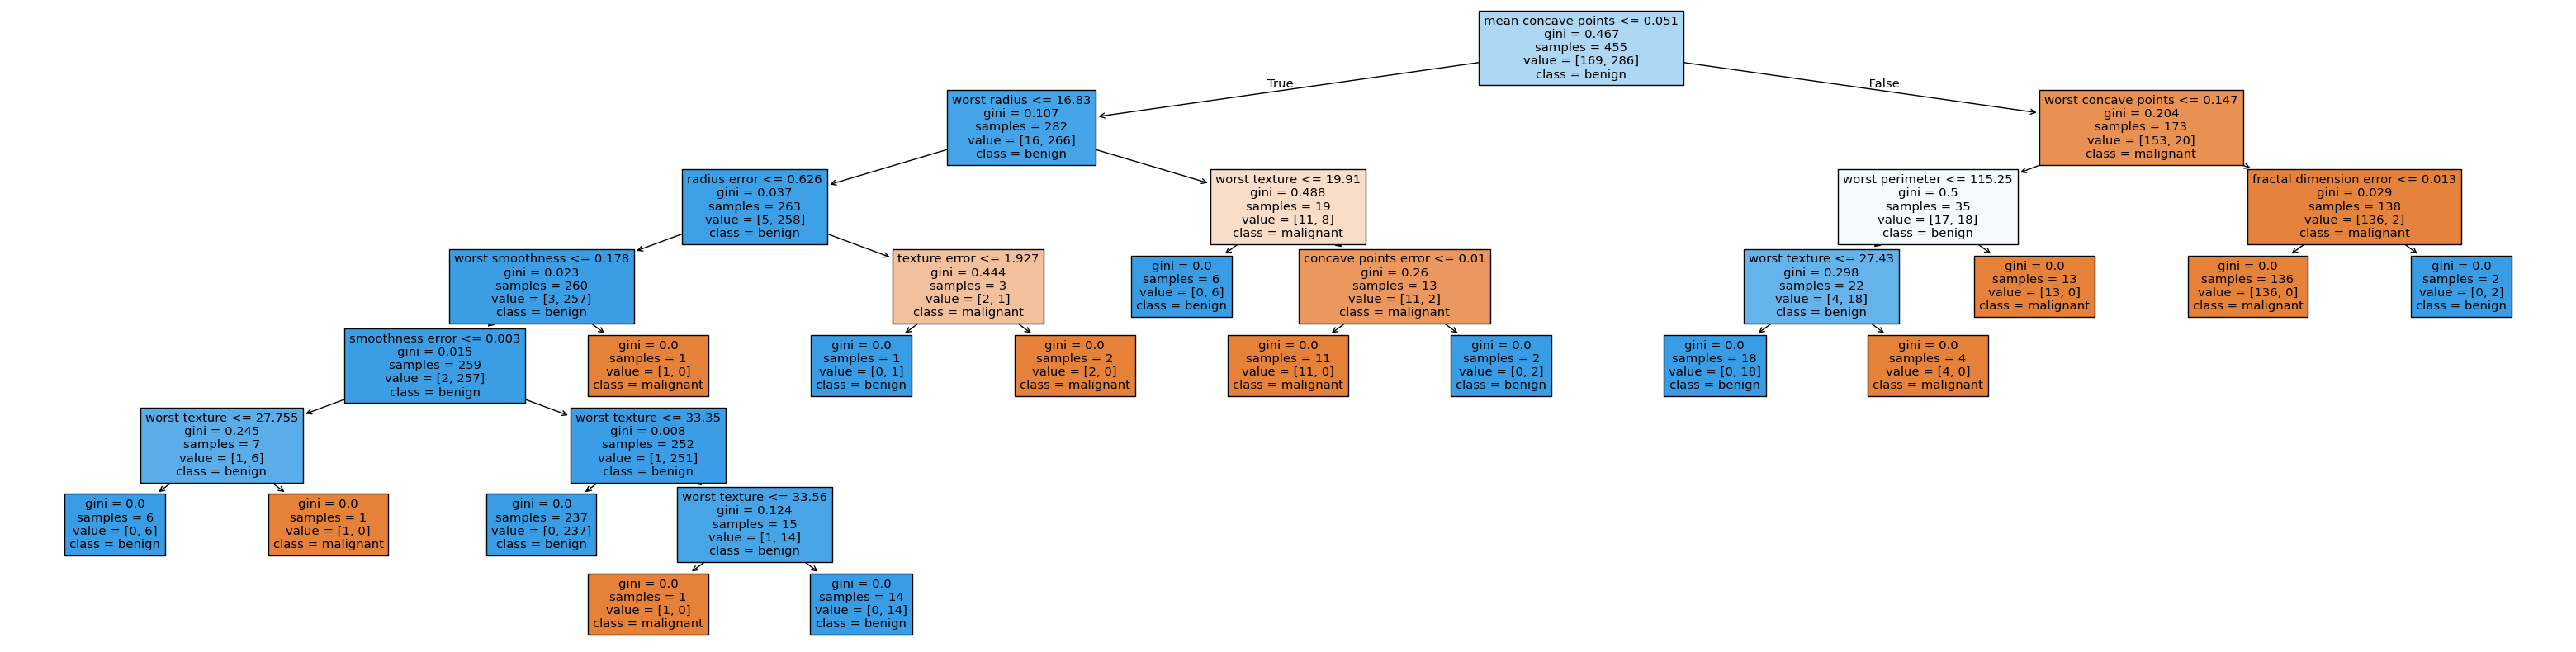

In [97]:
plt.figure(figsize=(40, 10))
plot_tree(model, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.show()

#### Plot the test predicted results

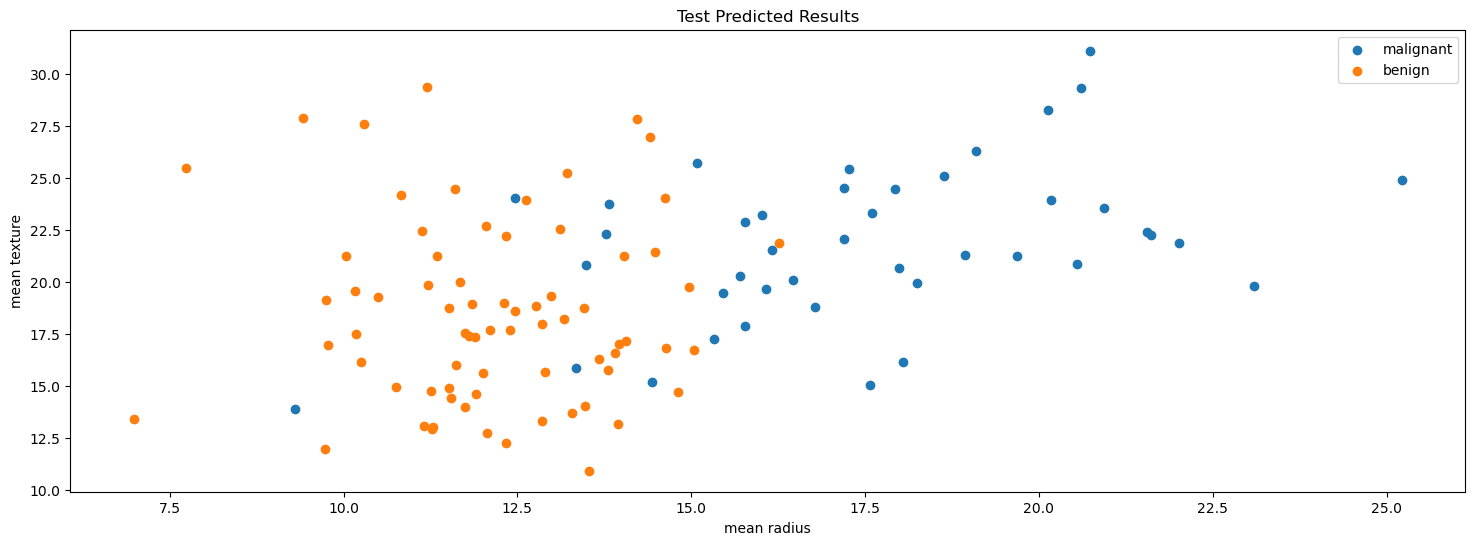

In [99]:
plt.figure(figsize=(18, 6))
# Iteration over unique classes and plot each class separately
for class_label in set(y_pred):
    # Select data points with the current class label
    class_data = X_test[y_pred == class_label]
    # Plot the data points with the current class label
    plt.scatter(class_data[:, 0], class_data[:, 1], label=cancer.target_names[class_label])

plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title('Test Predicted Results')
plt.legend()
plt.show()